In [56]:
import numpy as np
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt


In [57]:
def show(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # To hide axis labels and ticks
    plt.show()

In [58]:
path = 'test/4.png'
img = cv2.imread(path)

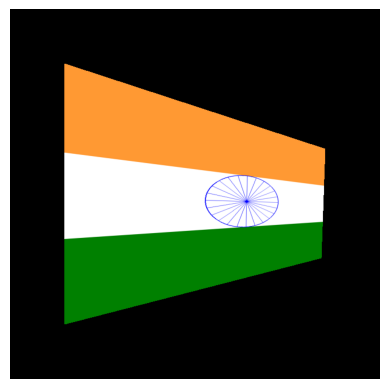

In [59]:
padding_size = 100
padded_image = cv2.copyMakeBorder(img, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_CONSTANT, value=(0, 0, 0))
show(padded_image)

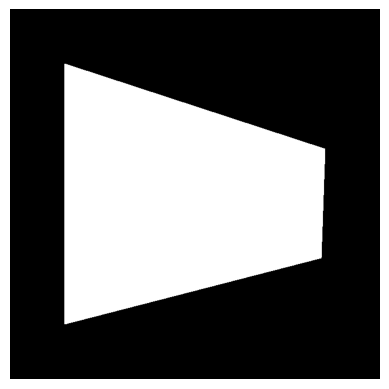

In [60]:
gray_img = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_img, 10, 255, cv2.THRESH_BINARY)
show(binary_image)

In [61]:
blurr = cv2.GaussianBlur(binary_image, (5, 5), 0)

# edges = cv2.Canny(blurr, 100, 200, apertureSize=5)
corners = cv2.goodFeaturesToTrack(blurr, 4, 0.01, 100)

In [62]:
p = []
for point in corners:
        p.append(point[0])

In [63]:

p = np.array(p)

In [64]:
p = sorted(p, key=lambda x: x[0])
if p[0][1] > p[1][1]: p[0], p[1] = p[1], p[0]
if p[2][1] < p[3][1]: p[2], p[3] = p[3], p[2]



In [65]:
print(p)

[array([101., 102.], dtype=float32), array([101., 579.], dtype=float32), array([572., 458.], dtype=float32), array([578., 258.], dtype=float32)]


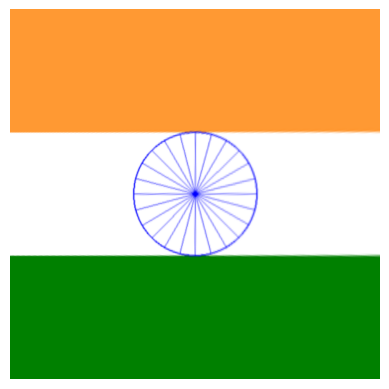

In [66]:

dst_pts = [[0, 0], [0,599], [599, 599], [599,0]]
transformation_matrix = cv2.getPerspectiveTransform(np.float32(p), np.float32(dst_pts))
output_img = cv2.warpPerspective(padded_image, transformation_matrix, (int(600), int(600)))

show(output_img)

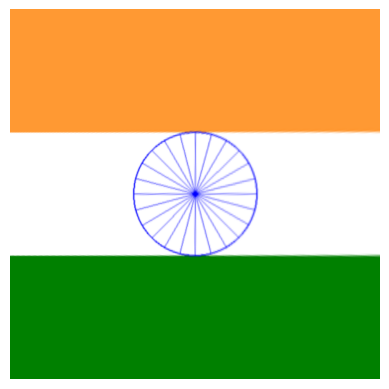

In [67]:
show(output_img)